# Project: Deep Learning with Convolution Neural Networks  (classify images of Zalando fashion articles) 

<br>

## Problem:
- Classify images of Zalando clothing articles: 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'. 
- Multiclass classification of images with deep learning and Convolution Neural Networks

<br>

## Tools:
- Tensorflow Sequential models
- Keras Conv2D, BatchNormalization, Dropout and MaxPool2D layers
- sklearn kfold validation and predictions

In [236]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import myML_functions as myML_functions

import tensorflow as tf
from keras import metrics
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.model_selection import KFold

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score, accuracy_score

## 1 - Load data

In [117]:
labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 
          'Bag', 'boot'] 
train_data = pd.read_csv('./data/fashion-mnist_train.csv')
train_data = train_data

test_data = pd.read_csv('./data/fashion-mnist_test.csv')

train_features = np.array(train_data.iloc[:,1:])
train_features = np.reshape(train_features,(len(train_data),28,28,1))
train_target = to_categorical(train_data.iloc[:,0])

test_features = np.array(test_data.iloc[:,1:])
test_features = np.reshape(test_features,(len(test_data),28,28,1))
test_target = to_categorical(test_data.iloc[:,0])

img_rows = train_features.shape[1]
img_cols = train_features.shape[2]
print('reading done')

reading done


## 2 - Build Model

when metrics = 'accuracy', keras automatically chooses one of: binary accuracy, categorial accuracy or sparse categorial accuracy, depending on the types of inputs

In [211]:
model = Sequential()
model.add(Conv2D(100, kernel_size=3, activation='relu', input_shape=(28, 28, 1),  
                 padding='same', strides=2, dilation_rate=1))
#model.add(Dropout(0.1))
model.add(BatchNormalization())
#model.add(MaxPool2D(2))
model.add(Conv2D(100, kernel_size=3, activation='relu',  
                 padding='same', strides=2, dilation_rate=1))
model.add(Dropout(0.1))
model.add(Conv2D(30, kernel_size=3, activation='relu',  
                 padding='same', strides=2, dilation_rate=1))
#model.add(Dropout(0.1))
model.add(BatchNormalization())
#model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

checkpoint = ModelCheckpoint('cnn_weights.hdf5', monitor='val_loss', save_best_only=True)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
callbacks_list = [checkpoint]
model.fit(train_features, train_target, validation_split=0.2, epochs=20, batch_size=1000, verbose=2,
          callbacks=callbacks_list)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 115s - loss: 0.6896 - acc: 0.7644 - val_loss: 0.4333 - val_acc: 0.8507
Epoch 2/20
 - 85s - loss: 0.3868 - acc: 0.8624 - val_loss: 0.3703 - val_acc: 0.8702
Epoch 3/20
 - 94s - loss: 0.3237 - acc: 0.8855 - val_loss: 0.3369 - val_acc: 0.8808
Epoch 4/20
 - 90s - loss: 0.2867 - acc: 0.8969 - val_loss: 0.3029 - val_acc: 0.8928
Epoch 5/20
 - 81s - loss: 0.2564 - acc: 0.9081 - val_loss: 0.2976 - val_acc: 0.8950
Epoch 6/20
 - 81s - loss: 0.2311 - acc: 0.9173 - val_loss: 0.3079 - val_acc: 0.8873
Epoch 7/20
 - 93s - loss: 0.2169 - acc: 0.9225 - val_loss: 0.2856 - val_acc: 0.9003
Epoch 8/20
 - 91s - loss: 0.1957 - acc: 0.9297 - val_loss: 0.2759 - val_acc: 0.9046
Epoch 9/20
 - 93s - loss: 0.1813 - acc: 0.9351 - val_loss: 0.2930 - val_acc: 0.8988
Epoch 10/20
 - 93s - loss: 0.1703 - acc: 0.9407 - val_loss: 0.2720 - val_acc: 0.9082
Epoch 11/20
 - 93s - loss: 0.1537 - acc: 0.9467 - val_loss: 0.2770 - val_acc: 0.9065
Epoch 12/20
 - 97s - lo

## 3 - Evaluate

In [233]:
model.load_weights('cnn_weights.hdf5')
score = model.evaluate(test_features, test_target, batch_size=10)
print(f"Evaluation test accuracy: {score[1]:0.2f}")

predictions = model.predict_classes(test_features)
test_decoded = np.argmax(test_target, axis=1)

accuracy = accuracy_score(test_decoded, predictions)
precision = precision_score(test_decoded, predictions, average='weighted')
recall = recall_score(test_decoded, predictions,  average='weighted')
f1 = f1_score(test_decoded, predictions,  average='weighted')
print(f"accuracy: {accuracy:0.3f}, precision: {precision:0.3f}, recall: {recall:0.3f}, f1: {f1:0.3f}\n")

print(classification_report(test_decoded, predictions, target_names=labels))
cm = confusion_matrix(test_decoded, predictions, labels=list(range(0,len(labels))))
myML_functions.print_cm(cm, labels=labels)

10000/10000 [==============================] - 9s 872us/step
Evaluation test accuracy: 0.91
accuracy: 0.908, precision: 0.908, recall: 0.908, f1: 0.908

              precision    recall  f1-score   support

     T-shirt       0.85      0.87      0.86      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.86      0.86      0.86      1000
       Dress       0.92      0.92      0.92      1000
        Coat       0.87      0.86      0.87      1000
      Sandal       0.99      0.95      0.97      1000
       Shirt       0.76      0.75      0.76      1000
     Sneaker       0.93      0.95      0.94      1000
         Bag       0.97      0.98      0.97      1000
        boot       0.95      0.96      0.95      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

   true / pred  T-shirt  Trouser Pullover    Dress     Coat   Sandal    Shirt  Sneaker  

<function matplotlib.pyplot.show(*args, **kw)>

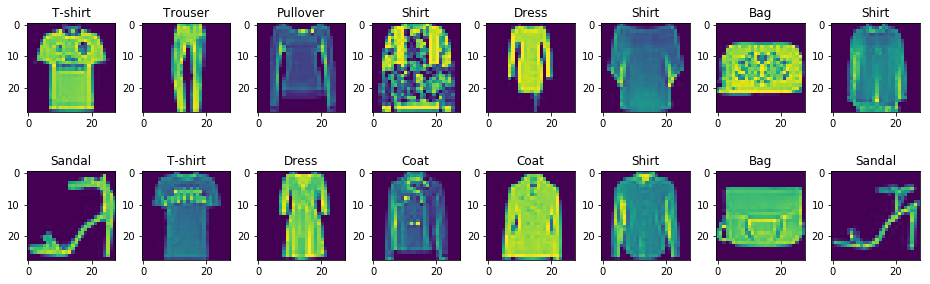

In [261]:
fig, ax = plt.subplots(figsize=(16,5))
grid = gridspec.GridSpec(2,8)
grid.update(wspace=0.3)

for idx in range(0,16):
    subplot = plt.subplot(grid[idx])
    subplot.imshow(test_features[idx, :, :, 0])
    subplot.set_title(labels[predictions[idx]])

plt.show

## 4 - Validation with SKlearn

### 4.1 - Cross Validation with Kfold

In [ ]:
def baseline_model():
    model = Sequential()
    model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(28, 28, 1),  
                     padding='same', strides=2, dilation_rate=1))
    #model.add(Dropout(0.1))
    model.add(BatchNormalization())
    #model.add(MaxPool2D(2))
    
    model.add(Conv2D(10, kernel_size=3, activation='relu',  
                     padding='same', strides=2, dilation_rate=1))
    #model.add(Dropout(0.1))
    model.add(BatchNormalization())
    #model.add(MaxPool2D(2))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_loss', save_best_only=True)

    model.compile(optimizer='adam', loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

In [195]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=1, batch_size=5, verbose=True, validation_split=0.2)
seed = 1
kfold = KFold(n_splits=2, shuffle=True, random_state=seed)
results = cross_val_score(estimator, train_features, train_target, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Train on 24000 samples, validate on 6000 samples
Epoch 1/1
30000/30000 [==============================] - 22s 745us/step
Train on 24000 samples, validate on 6000 samples
Epoch 1/1
30000/30000 [==============================] - 30s 991us/step
Baseline: 85.14% (0.33%)


### 4.2 - cross_val_predict and sklearn metrics

In [200]:
kfold = KFold(n_splits=2, shuffle=True, random_state=seed)
predictions = cross_val_predict(estimator, train_features, train_target, cv=kfold)

Train on 24000 samples, validate on 6000 samples
Epoch 1/1
30000/30000 [==============================] - 34s 1ms/step
Train on 24000 samples, validate on 6000 samples
Epoch 1/1
30000/30000 [==============================] - 21s 691us/step


In [201]:
target_decoded = np.argmax(train_target, axis=1)
accuracy = accuracy_score(target_decoded, predictions)
precision = precision_score(target_decoded, predictions, average='weighted')
recall = recall_score(target_decoded, predictions,  average='weighted')
f1 = f1_score(target_decoded, predictions,  average='weighted')
print(f"accuracy: {accuracy:0.3f}, precision: {precision:0.3f}, recall: {recall:0.3f}, f1: {f1:0.3f}")

accuracy: 0.844, precision: 0.848, recall: 0.844, f1: 0.845


## 5 - Inspect Kernels

kernel size, kernel size, Number of channels (colours), number of kernels in this layer
(3, 3, 1, 100)
(3, 3)


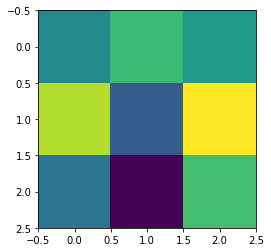

In [136]:
conv1 = model.layers[0]
weights1 = conv1.get_weights()
conv2 = model.layers[2]
weights2 = conv2.get_weights()
conv3 = model.layers[4]
weights3 = conv3.get_weights()


#first element is an array fo weights for the kernel
kernel1 = weights1[0]
kernel2 = weights2[0]
kernel3 = weights3[0]
print("kernel size, kernel size, Number of channels (colours), number of kernels in this layer")
print(weights1[0].shape)

# Pull out the first channel of the first kernel in the first layer
kernel1_1 = weights1[0][:,:,0, 0]
kernel2_1 = weights2[0][:,:,0, 0]
kernel3_1 = weights3[0][:,:,0, 0]
print(kernel1_1.shape)

plt.imshow(kernel1_1)
plt.imshow(kernel2_1)

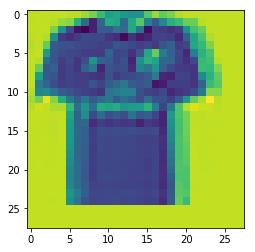

In [139]:
def convolution(im, kernel):
    result = np.zeros((im.shape[0], im.shape[1]))
    for ii in range(im.shape[0] - kernel.shape[0]):
        for jj in range(im.shape[1] - kernel.shape[1]):
            result[ii, jj] = (im[ii:ii+kernel.shape[0], jj:jj+kernel.shape[1]] * kernel).sum()
    return result

test_image = test_features[0, :, :, 0]
plt.imshow(test_image)
filtered_image = convolution(test_image,kernel3_1)
plt.imshow(filtered_image)

## 6 - Custom metrics

In [147]:
import keras.backend as K

def c1_c2_c3(y_true, y_pred):
    # Count positive samples.
    c1 = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    c2 = K.sum(K.round(K.clip(y_pred, 0, 1)))
    c3 = K.sum(K.round(K.clip(y_true, 0, 1)))
    
    return(c1,c2,c3)

def f1_score(y_true, y_pred):

    (c1,c2,c3) = c1_c2_c3(y_true, y_pred)

    # If there are no true samples, fix the F1 score at 0.
    if c3 == 0:
        return 0

    # How many selected items are relevant?
    precision = c1 / c2

    # How many relevant items are selected?
    recall = c1 / c3

    # Calculate f1_score
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

def precision(y_true, y_pred):
    
    (c1,c2,c3) = c1_c2_c3(y_true, y_pred)

    return c1 / c2

def recall(y_true, y_pred):
    
    (c1,c2,c3) = c1_c2_c3(y_true, y_pred)
    
    # If there are no true samples, fix the F1 score at 0.
    if c3 == 0:
        return 0
    
    return c1 / c3

In [ ]:
def my_metric(y_true, y_pred):

    g = tf.subtract(tf.expand_dims(y_pred, -1), y_pred)
    g = tf.cast(g == 0.0, tf.float32) * 0.5 + tf.cast(g > 0.0, tf.float32)

    f = tf.subtract(tf.expand_dims(y_true, -1), y_true) > 0.0
    f = tf.matrix_band_part(tf.cast(f, tf.float32), -1, 0)

    g = tf.reduce_sum(tf.multiply(g, f))
    f = tf.reduce_sum(f)

    return tf.where(tf.equal(g, 0), 0.0, g/f) #select